<a href="https://colab.research.google.com/github/honggilgim/python_test_with_colab/blob/main/%EC%9D%91%EC%9A%A9%EC%88%98%ED%95%99_2022%EB%85%84_1%ED%95%99%EA%B8%B0_2016038005_%EA%B9%80%ED%99%8D%EA%B8%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow
import os

train = pd.read_csv('/content/train2.csv')
test = pd.read_csv('/content/test2.csv')

train.drop('id', axis=1, inplace=True)
test.drop('id', axis=1, inplace=True)

In [ ]:
import joblib

In [ ]:
# 이상치 제거 - 데이터 이상치를 제거하여 학습 성능을 높임

data_train = train.drop(index = [47, 382, 435, 847, 1078], axis = 0) # 전복무게 + 껍질무게 > 전체무게
data_train = data_train.drop(index = [119, 129,179, 224, 290, 324, 346, 368, 374, 418, 430, 544, 599,\
                                      637, 692, 765, 794, 807, 817, 856, 922, 987, 989, 1013, 1020, \
                                      1035 ,1041, 1057, 1090, 1110, 1112], axis = 0) # 전체 무게 < (전복무게 + 내장무게 + 껍데기 무게) 인 경우(삭제)

In [ ]:
# foreign body column 추가, 전복 전체 무게 중 불필요한 물질들의 값.
train_X = train.drop('Target', axis=1)
train_y = train.Target

train_X = pd.get_dummies(data = train_X, columns = ['Gender'], prefix = 'Gender')
test = pd.get_dummies(data = test, columns = ['Gender'], prefix = 'Gender')

foreign_body = train_X['Whole Weight'] - (train_X['Shucked Weight'] + train_X['Viscra Weight'] + train_X['Shell Weight'])
train_X['foreign body'] = foreign_body
train_X.loc[train_X['foreign body'] < 0 , 'foreign body'] = 0


foreign_body = test['Whole Weight'] - (test['Shucked Weight'] + test['Viscra Weight'] + test['Shell Weight'])
test['foreign body'] = foreign_body
test.loc[test['foreign body'] < 0 , 'foreign body'] = 0

In [ ]:
#gender 데이터 분류 M/F인 데이터와 I인 데이터 분류
train_X_MF=train_X[(train_X['Gender_F']==1) | (train_X['Gender_M']==1)]
train_y_MF=train_y[(train_X['Gender_F']==1) | (train_X['Gender_M']==1)]
train_X_I=train_X[train_X['Gender_I']==1]
train_y_I=train_y[train_X['Gender_I']==1]

test_MF=test[(test['Gender_F']==1) | (test['Gender_M']==1)]
test_MF_idx=test_MF.index
test_I=test[test['Gender_I']==1]
test_I_idx=test_I.index

train_X_MF.drop(['Gender_F', 'Gender_I', 'Gender_M'], axis=1, inplace=True)
train_X_I.drop(['Gender_F', 'Gender_I', 'Gender_M'], axis=1, inplace=True)

test_MF.drop(['Gender_F', 'Gender_I', 'Gender_M'], axis=1, inplace=True)
test_I.drop(['Gender_F', 'Gender_I', 'Gender_M'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
####### 여기부터, 학습 #######
"""
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import *
"""

In [ ]:
"""
temp=train_X
temp['y']=train_y.values
temp['Gender_MF']=temp['Gender_F']+temp['Gender_M']
"""

In [ ]:
#ntest_MF=test_MF.drop('Target', axis=1)

In [ ]:
#ntest_I=test_I.drop('Target', axis=1)

In [ ]:
"""
test_MF_data = pd.DataFrame(test_MF)
test_MF_data.to_csv('test_MF.csv',index=False)
"""

In [ ]:
"""
for MIF in ['MF', 'I']:
    model = Sequential()
    model.add(Dense(16, input_dim=9, activation='elu'))
    model.add(Dense(32, activation='elu'))
    model.add(Dense(64, activation='elu'))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='elu'))
    model.add(Dense(16, activation='elu'))
    model.add(Dense(1))



    model.compile(loss='mean_absolute_error',
                  optimizer='Nadam',
                  metrics=['mae'])


    MODEL_DIR = './model_{0}/'.format(MIF)
    if not os.path.exists(MODEL_DIR):
        os.mkdir(MODEL_DIR)

    temp='./model_' + MIF  + '/'
    modelpath= temp + '{epoch:02d}-{val_loss:.4f}.hdf5'
    #modelpath = './model_{0}/{epoch:02d}-{val_loss:.4f}.hdf5'.format(MIF)

    # 모델 업데이트 및 저장
    cp = ModelCheckpoint(filepath=modelpath, monitor='val_mae', verbose=0, save_best_only=True, mode = 'min')

    # 학습 자동 중단 설정
    es = EarlyStopping(monitor='val_mae', patience=50, mode='min')

    rlrp = ReduceLROnPlateau(monitor='val_mae', factor=0.2, patience=40, mode='min')

    # 모델 학습
    if MIF=='MF':
        model.fit(train_X_MF, train_y_MF, validation_split=0.3, epochs=1000, batch_size=32, verbose=1, callbacks=[es, cp, rlrp])
        joblib.dump(model,'./2016038005_김홍길_MF.pkl')


    elif MIF=='I':
        model.fit(train_X_I, train_y_I, validation_split=0.3, epochs=1000, batch_size=32, verbose=1, callbacks=[es, cp, rlrp])
        joblib.dump(model,'./2016038005_김홍길_I.pkl')


####### 여기까지 학습 #######
"""

Epoch 1/1000
17/17 [==============================] - 1s 14ms/step - loss: 35.5400 - mae: 35.5400 - val_loss: 17.0070 - val_mae: 17.0070 - lr: 0.0010
Epoch 2/1000
17/17 [==============================] - 0s 6ms/step - loss: 17.1002 - mae: 17.1002 - val_loss: 9.3252 - val_mae: 9.3252 - lr: 0.0010
Epoch 3/1000
17/17 [==============================] - 0s 5ms/step - loss: 12.1556 - mae: 12.1556 - val_loss: 11.0798 - val_mae: 11.0798 - lr: 0.0010
Epoch 4/1000
17/17 [==============================] - 0s 6ms/step - loss: 9.5403 - mae: 9.5403 - val_loss: 7.5991 - val_mae: 7.5991 - lr: 0.0010
Epoch 5/1000
17/17 [==============================] - 0s 6ms/step - loss: 7.6507 - mae: 7.6507 - val_loss: 6.7181 - val_mae: 6.7181 - lr: 0.0010
Epoch 6/1000
17/17 [==============================] - 0s 6ms/step - loss: 7.3091 - mae: 7.3091 - val_loss: 5.5568 - val_mae: 5.5568 - lr: 0.0010
Epoch 7/1000
17/17 [==============================] - 0s 4ms/step - loss: 6.3671 - mae: 6.3671 - val_loss: 6.5658 - val

In [1]:
#### 여기부터 테스트 #####

import numpy as np
import pandas as pd
import tensorflow
import os

test = pd.read_csv('/content/test2.csv')
test.drop('id', axis=1, inplace=True)

In [2]:
import joblib

In [3]:
# 학습을 위해 바꿨던 값들 테스트를 위해 test항목을 다시 바꿔줌.
test = pd.get_dummies(data = test, columns = ['Gender'], prefix = 'Gender')
foreign_body = test['Whole Weight'] - (test['Shucked Weight'] + test['Viscra Weight'] + test['Shell Weight'])
test['foreign body'] = foreign_body
test.loc[test['foreign body'] < 0 , 'foreign body'] = 0

In [4]:
test_MF=test[(test['Gender_F']==1) | (test['Gender_M']==1)]
test_MF_idx=test_MF.index
test_I=test[test['Gender_I']==1]
test_I_idx=test_I.index
test_MF.drop(['Gender_F', 'Gender_I', 'Gender_M'], axis=1, inplace=True)
test_I.drop(['Gender_F', 'Gender_I', 'Gender_M'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [5]:
ntest_MF=test_MF.drop('Target', axis=1)
ntest_I=test_I.drop('Target', axis=1)

In [6]:
# 모델 호출, MF와 I로 나누어서 모델을 선정하고 학습하였기에, 따로 호출해야 함.
loaded_model_MF = joblib.load('/content/2016038005_김홍길_MF.pkl')
loaded_model_I = joblib.load('/content/2016038005_김홍길_I.pkl')

In [7]:
Y_prediction = loaded_model_MF.predict(ntest_MF).flatten()
Y_prediction_data = pd.DataFrame(Y_prediction)
Y_prediction_data.to_csv('MF_test.csv',index=False)

In [8]:
Y_prediction = loaded_model_I.predict(ntest_I).flatten()
Y_prediction_data = pd.DataFrame(Y_prediction)
Y_prediction_data.to_csv('I_test.csv',index=False)

In [9]:
# 점수 측정을 위한 함수
def NMAE(true, pred):
    mae = np.mean(np.abs(true-pred))
    score = mae / np.mean(np.abs(true))
    return score

In [10]:
result_MF = pd.read_csv('/content/MF_test.csv')
result_I = pd.read_csv('/content/I_test.csv')

In [11]:
result_MF.columns=['Target']
result_I.columns=['Target']
answer = pd.DataFrame(test_MF['Target'])
answer.to_csv('answer.csv',index=False)

In [12]:
answer=pd.read_csv('/content/answer.csv')
result_MF = pd.concat([answer, result_MF], axis=1)

In [13]:
answer = pd.DataFrame(test_I['Target'])
answer.to_csv('answer.csv',index=False)
answer=pd.read_csv('/content/answer.csv')
result_I = pd.concat([answer, result_I], axis=1)

In [14]:
result = pd.concat([result_MF,result_I])

In [15]:
result.columns = ['answer','prediction']

In [16]:
score = NMAE(result['answer'],result['prediction'])
print('전복 나이 예측에 대한 nmae 값 : ' + str(score))

전복 나이 예측에 대한 nmae 값 : 0.1637798242937853


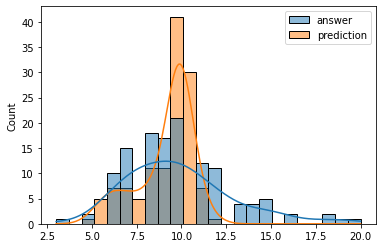

In [17]:
import seaborn as sns
sns.histplot(data=result,kde=True)

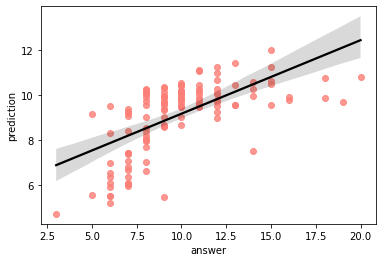

In [18]:
# 기울기가 1에 가깝고, 산포도가 그래프에 가까울수록 예측이 잘된 것.
sns.regplot(x = 'answer', y = 'prediction', data = result, scatter_kws={"color": "#FC7F77"}, line_kws={"color": "black"})

In [19]:
result['answer'].mean()

9.833333333333334

In [20]:
result['prediction'].mean()

9.127020153174604

In [21]:
err = np.abs(result['answer'] - result['prediction'])

In [22]:
err.mean()

1.6105016055555554

In [23]:
err.max()

9.281908

In [ ]:
err.min()

0.013992000000000004

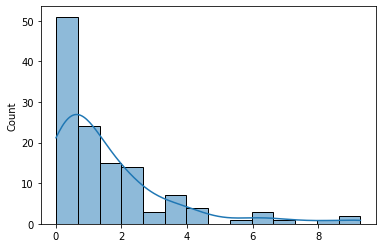

In [24]:
sns.histplot(data=err,kde=True)